Some plots of the Lorenz system


In [2]:
# Export pictures to .eps
using Plots
using LinearAlgebra
using DifferentialEquations
include("Solvers.jl")

RK4 (generic function with 2 methods)

In [21]:
## parameter values
θ = -10.0; β = 1; μ = 10.0
time = 50
Δt = 0.001

# initial values
x₀ = 10; y₀ = 30; z₀ = 10
x̄₀ = [x₀;
      y₀;
      z₀]

3-element Vector{Int64}:
 10
 30
 10

In [30]:
# Preexisting Julia Solver
prob = ODEProblem(LorentzSystem,[x₀,y₀,z₀],(0.0,1),[θ,μ,β])
#sol9 = solve(prob,Vern9()) # followed DTM very well
#sol12 = solve(prob,Feagin12())
#sol0 = solve(prob)
solII = solve(prob,RadauIIA5())
#sol5 = solve(prob,Rodas5())
#plot(solII,idxs=(1))

retcode: Success
Interpolation: 3rd order Hermite
t: 31466-element Vector{Float64}:
 0.0
 0.030223743521384443
 0.06044748704276889
 0.08029913678344913
 0.09566086067084359
 0.10795157510302347
 0.11730574238931243
 0.1316225103578974
 0.14340070101063385
 0.15262509227961882
 ⋮
 0.9999708676877127
 0.9999740103714089
 0.9999777697826154
 0.999981529193822
 0.999985676420331
 0.9999895746438523
 0.9999928223239701
 0.9999964992823586
 1.0
u: 31466-element Vector{Vector{Float64}}:
 [10.0, 30.0, 10.0]
 [3.174677311118769, 28.533300992339882, 15.57545990120921]
 [-5.614839013688792, 27.82579321000384, 14.258830600092786]
 [-12.942936914713034, 27.563928163774666, 8.977118966686586]
 [-19.574710325568585, 26.040149459720848, 2.1903605202339804]
 [-25.350364701439865, 22.63209950910819, -4.547281120709022]
 [-29.847686420212916, 17.986420045670286, -9.750790865606639]
 [-36.43331634494993, 6.822889940747464, -15.56171695773351]
 [-41.12199769890586, -5.137758465441117, -15.755326219380642]

In [31]:
prob = ODEProblem(LorentzSystem,[x₀,y₀,z₀],(0.0,2),[θ,μ,β])
solII = solve(prob,RadauIIA5())


retcode: Success
Interpolation: 3rd order Hermite
t: 461565-element Vector{Float64}:
 0.0
 0.030223743521384443
 0.06044748704276889
 0.08029913678344913
 0.09566086067084359
 0.10795157510302347
 0.11730574238931243
 0.1316225103578974
 0.14340070101063385
 0.15262509227961882
 ⋮
 1.7522265496772536
 1.781452843133558
 1.8124990331945823
 1.846385644120859
 1.8795143769866782
 1.9081558932620684
 1.9379789815869368
 1.9689894907934684
 2.0
u: 461565-element Vector{Vector{Float64}}:
 [10.0, 30.0, 10.0]
 [3.174677311118769, 28.533300992339882, 15.57545990120921]
 [-5.614839013688792, 27.82579321000384, 14.258830600092786]
 [-12.942936914713034, 27.563928163774666, 8.977118966686586]
 [-19.574710325568585, 26.040149459720848, 2.1903605202339804]
 [-25.350364701439865, 22.63209950910819, -4.547281120709022]
 [-29.847686420212916, 17.986420045670286, -9.750790865606639]
 [-36.43331634494993, 6.822889940747464, -15.56171695773351]
 [-41.12199769890586, -5.137758465441117, -15.75532621938064

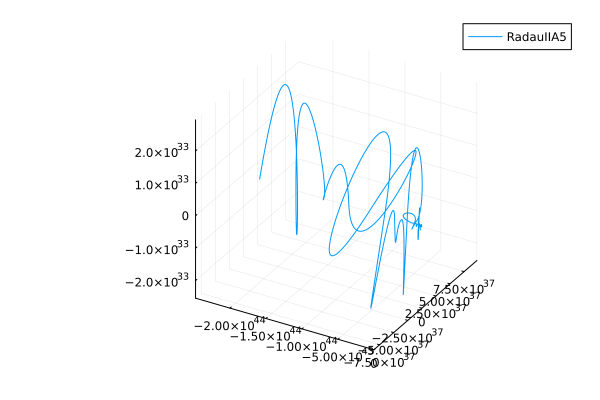

In [29]:
plot(solII,vars=(1,2,3),label="RadauIIA5")

In [23]:
# Runga-Kutta 4
Δt_RK = 0.1
tsteps_RK = Int(time/Δt_RK)
x̄=x̄₀
XRK = zeros(3,tsteps_RK)
for i=1:tsteps_RK
    x̄=RK4([θ,μ,β],x̄,Δt_RK)
    XRK[:,i] = x̄
end
print(x̄)

[-8.272673598074253, -0.43642769633358824, 34.25405752760986]

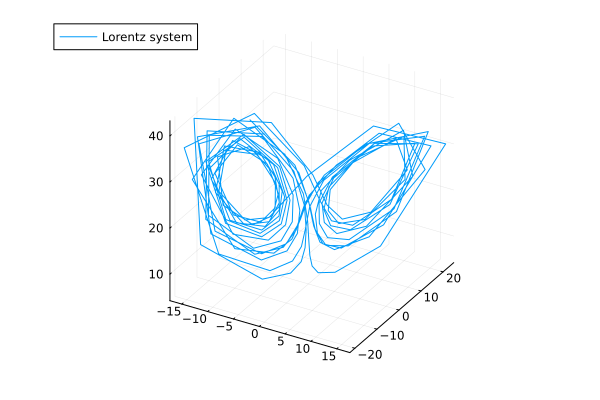

In [24]:
plot(XRK[1,:],XRK[2,:],XRK[3,:],label="Lorentz system")

In [20]:
# Euler
#Δt = 0.001
tsteps = Int(time/Δt)
x̄=x̄₀
Xeuler = zeros(3,tsteps)
for i=1:tsteps
    x̄=EulerForward([θ,μ,β],x̄,Δt)
    Xeuler[:,i] = x̄
end
print(x̄)

[-9.595246434145746, -4.823023024207817, 33.393926994897534]

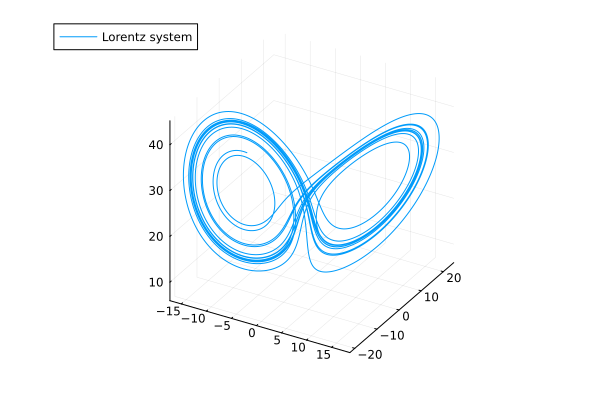

In [21]:
plot(Xeuler[1,:],Xeuler[2,:],Xeuler[3,:],label="Lorentz system")

In [ ]:
plot(XRK[1,:]-Xeuler[1,:],XRK[2,:]-Xeuler[2,:],XRK[3,:]-Xeuler[3,:],label="Lorentz system")

In [6]:
#DTM
Δt_DTM = 0.001
tsteps_DTM = Int(time/Δt_DTM)
x̄=x̄₀
terms=20
XDTM = zeros(3,tsteps_DTM)
for i=1:tsteps_DTM
    x̄=DTM([θ,μ,β],x̄, Δt_DTM, terms)
    XDTM[:,i] = x̄
end

In [8]:
plot(XDTM[1,:],XDTM[2,:],XDTM[3,:],label="Lorentz system")
savefig("sexy_lorentz.png")

"/Users/00eila01/01_Arbete/UTBILDNING/KEXET/Numerical-Solutions-and-Parameter-Sensitivity-of-the-Lorentz-System-Degree-Project-in-Technology/Numerical-Solvers/sexy_lorentz.png"

In [10]:
#plot(range(0,stop=time-Δt_DTM,step=Δt_DTM),XDTM[1,:])
plot(range(0,stop=time-Δt_RK,step=Δt_RK),XRK[1,:])
plot!(solII,idxs=(1))
plot!(sol9,idxs=(1))
plot!(sol5,idxs=(1))
#plot!(sol12,idxs=(1))
#plot!(t,Xeuler[1,:])

UndefVarError: UndefVarError: Δt_RK not defined

In [ ]:
plot(range(0,stop=time-Δt_DTM,step=Δt_DTM),XDTM[2,:])
plot!(range(0,stop=time-Δt_RK,step=Δt_RK),XRK[2,:])
plot!(sol,idxs=(2))